In [1]:
from fastai.vision .all import *
import fastai
path = untar_data(URLs.PETS)
# For Fastai and PyTorch to explicitly use CPU


In [2]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale=0.75))
#pets.summary(path/"images", bs=12, device='cpu')
dls = pets.dataloaders(path/"images")

/Users/koto/miniconda3/envs/fast/lib/python3.11/site-packages/torch/_tensor.py:1418: UserWarning: The operator 'aten::_linalg_solve_ex.result' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  ret = func(*args, **kwargs)


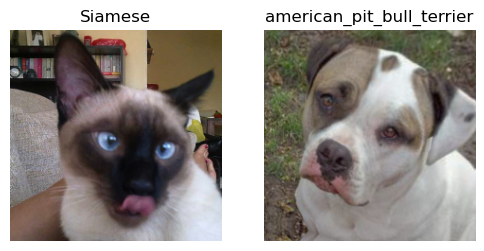

In [3]:
dls.show_batch(nrows=1, ncols=2)

In [4]:
device = torch.device('mps:0')
learn  = vision_learner(dls, resnet18, metrics=error_rate)
learn.model.to(device)
print(next(learn.model.parameters()).device)  # Check model device
print(learn.dls.device)  # Check data loader device

#learn.fine_tune(2)

mps:0
mps


In [5]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time


False


RuntimeError: Adaptive pool MPS: input sizes must be divisible by output sizes.

In [6]:
print(models)

<module 'fastai.vision.models' from '/Users/koto/miniconda3/envs/fast/lib/python3.11/site-packages/fastai/vision/models/__init__.py'>
